In [11]:
import pandas as pd
import numpy as np

# Create some dummy sales data
data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Quantity': [10, 20, 15, 5, 10, 25, 8, 18, 20],
    'Price': [100, 200, 150, 110, 190, 140, 105, 205, 160],
    'Date': pd.date_range('2023-01-01', periods=9, freq='D')
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file (optional)
df.to_csv('sales_data.csv', index=False)


In [12]:
# Load the data from the CSV file (you can also load from a database)
df = pd.read_csv('sales_data.csv')

# Check the first few rows of the dataset
print(df.head())



  Product  Quantity  Price        Date
0       A        10    100  2023-01-01
1       B        20    200  2023-01-02
2       C        15    150  2023-01-03
3       A         5    110  2023-01-04
4       B        10    190  2023-01-05


In [13]:
# Calculate total sales for each transaction (Quantity * Price)
df['Total Sales'] = df['Quantity'] * df['Price']

# Use NumPy to calculate statistical measures
total_sales = np.sum(df['Total Sales'])  # Total sales amount
avg_sales = np.mean(df['Total Sales'])  # Average sales per transaction

# Find the highest sales day
max_sales_day = df.loc[df['Total Sales'].idxmax()]

print(f"Total Sales: ${total_sales}")
print(f"Average Sales per Transaction: ${avg_sales:.2f}")
print(f"Highest Sales Day: {max_sales_day['Date']} with ${max_sales_day['Total Sales']} in sales")

# Group by Product and calculate total sales and average sales
product_sales = df.groupby('Product').agg(
    total_sales=('Total Sales', 'sum'),
    avg_sales=('Total Sales', 'mean')
).reset_index()

print("\nSales Summary by Product:")
print(product_sales)


Total Sales: $20930
Average Sales per Transaction: $2325.56
Highest Sales Day: 2023-01-02 with $4000 in sales

Sales Summary by Product:
  Product  total_sales    avg_sales
0       A         2390   796.666667
1       B         9590  3196.666667
2       C         8950  2983.333333


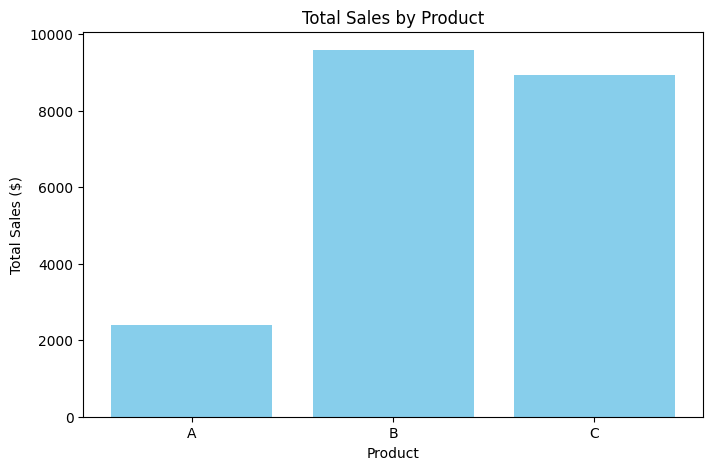

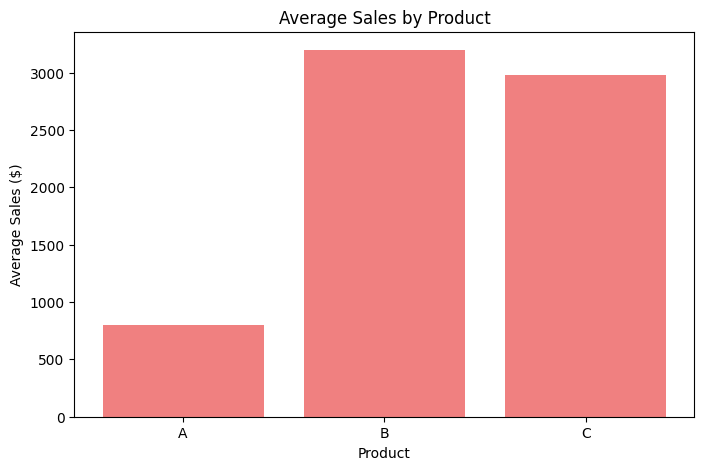

In [ ]:
import matplotlib.pyplot as plt

# Plot total sales per product
plt.figure(figsize=(8, 5))
plt.bar(product_sales['Product'], product_sales['total_sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Product')
plt.show()

# Plot average sales per product
plt.figure(figsize=(8, 5))
plt.bar(product_sales['Product'], product_sales['avg_sales'], color='lightcoral')
plt.xlabel('Product')
plt.ylabel('Average Sales ($)')
plt.title('Average Sales by Product')
plt.show()


